#1 Packages

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import tensorflow.keras.layers as tfl
from fastai.vision.all import *
from fastai.metrics import accuracy, error_rate
from fastai.vision.core import imagenet_stats, PILImage
from fastai.vision.data import ImageDataLoaders
from fastai.vision.augment import aug_transforms, Resize
from fastai.vision.learner import cnn_learner, vision_learner
from fastai.data.transforms import Normalize

from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation, RandomCrop, RandomZoom, RandomContrast
import torchvision.models as models



# 1.1 Create the Dataset and Split it into Training and Validation Sets


In [2]:
BATCH_SIZE = 32
IMG_SIZE = (224, 224)
directory = "D:\\University\\ArchitectureStyles\\archive\\architectural-styles-dataset"
train_dataset = image_dataset_from_directory(directory,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE,
                                             validation_split=0.2,
                                             label_mode='categorical',
                                             subset='training',

                                             seed=42)
validation_dataset = image_dataset_from_directory(directory,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE,
                                             validation_split=0.2,
                                             subset='validation',
                                             label_mode='categorical',
                                             seed=42)

Found 10112 files belonging to 25 classes.
Using 8090 files for training.
Found 10112 files belonging to 25 classes.
Using 2022 files for validation.


# 2 Preprocess and Augment Training Data

In [3]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)

Augumented images

# 3 Using MobileNetV2

In [4]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


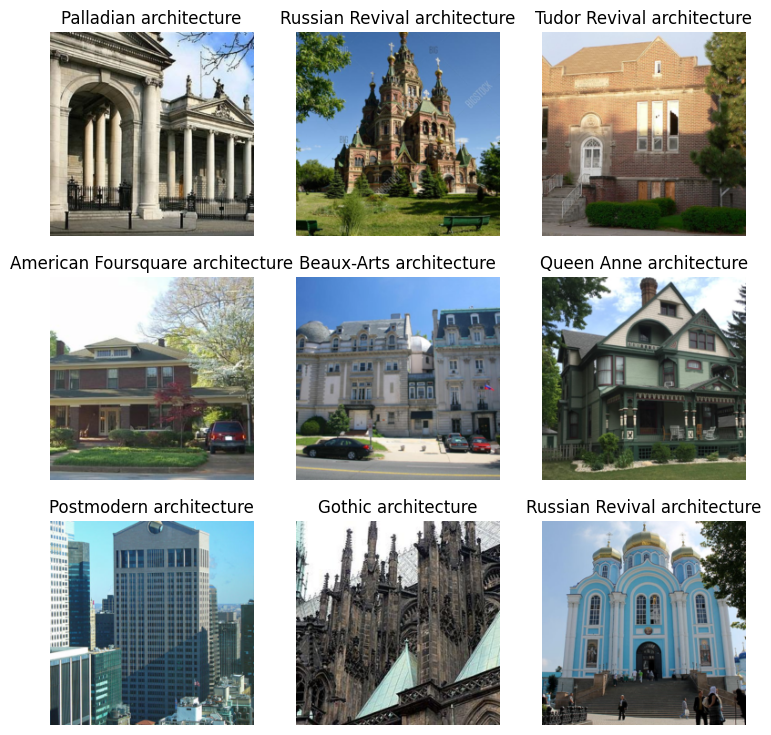

In [6]:
tfms = aug_transforms(do_flip=True, flip_vert=False, max_rotate=10, max_zoom=1.1,
                      max_lighting=0.2, max_warp=0.2, p_affine=0.75, p_lighting=0.75, size=224)



data = ImageDataLoaders.from_folder(directory, train=".", valid_pct=0.2, item_tfms=Resize(224),
                                  size=224, num_workers=4, padding_mode='reflection', bs=64,  batch_tfms=Normalize.from_stats(*imagenet_stats))


data.show_batch()

In [22]:
learn = vision_learner(data, models.mobilenet_v3_large,metrics=[accuracy, error_rate])

In [23]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,2.608449,1.542576,0.555885,0.444115,12:55
1,1.721524,1.231089,0.625124,0.374876,10:37
2,1.271106,1.120587,0.658259,0.341741,10:37
3,1.080500,1.105763,0.658754,0.341246,10:33


Results

In [24]:
learn.save('stage-1-mobilenet3')

Path('D:/University/ArchitectureStyles/archive/architectural-styles-dataset/models/stage-1-mobilenet3.pth')

In [25]:
learn.unfreeze()

AttributeError: 'Sequential' object has no attribute 'plot'

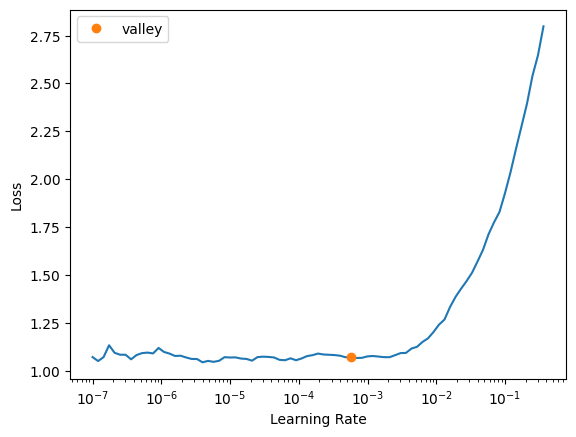

In [26]:
learn.lr_find()
learn.recorder.plot()

In [28]:
learn.fit_one_cycle(6, lr_max=slice(1e-5, 1e-4))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.020593,1.097722,0.660237,0.339763,12:11
1,1.016657,1.082594,0.669634,0.330366,12:16
2,0.960508,1.064644,0.673096,0.326904,12:11
3,0.925026,1.053423,0.677547,0.322453,12:11
4,0.896289,1.051641,0.681009,0.318991,12:09
5,0.853264,1.048413,0.680020,0.319980,12:09


In [29]:
learn.save('stage-2-mobilenet3')

Path('D:/University/ArchitectureStyles/archive/architectural-styles-dataset/models/stage-2-mobilenet3.pth')